# Fraud Detection Case Study

In [1]:
import cPickle as pickle
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

from DataPrep import feature_prep
from MKMConfusionMatrix import show_confusion_matrix

In [2]:
data = pd.read_json('data/data.json')
df = feature_prep(data)
# df.to_csv('CleanFraudData.csv')

DataPrep.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[c][pd.isnull(df[c])] = 0
DataPrep.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['org_facebook'][pd.isnull(df['org_facebook'])] = 9999
DataPrep.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['org_twitter'][pd.isnull(df['org_twitter'])] = 9999
DataPrep.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

In [3]:
y = df['fraud']
X = df.copy()
del X['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
print np.around(y.mean()*100,2),"%"
print np.around(100-y.mean()*100,2),"%"

9.02 %
90.98 %


In [4]:
sample_weight_train = np.array([91 if i == 0 else 9 for i in y_train])
sample_weight_test = np.array([91 if i == 0 else 9 for i in y_test])

In [5]:
rf1 = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                            max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                            random_state=None, verbose=0, warm_start=False, class_weight={0:0.91, 1:0.09})

rf1.fit(X_train, y_train,sample_weight_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.91, 1: 0.09},
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

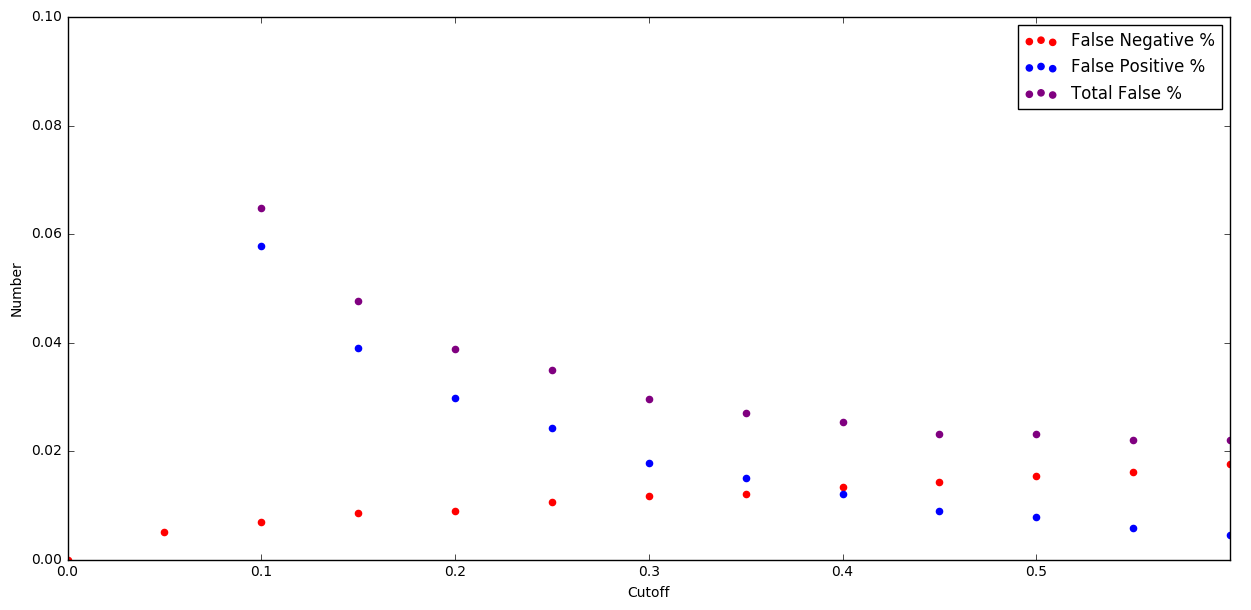

In [6]:
false_pos_pct = []
false_neg_pct = []
false_pct = []
cutoff = range(0,100,5)
cutoff_pct =[]

for i in cutoff:
    CM = confusion_matrix(y_test, rf1.predict_proba(X_test)[:,1] > i/float(100))
    tp = CM[1,1]
    fp = CM[0,1]
    fn = CM[1,0]
    tn = CM[0,0]
    total = float(tp+tn+fp+fn)    

    false_pos_pct.append(fp/total)
    false_neg_pct.append(fn/total)
    false_pct.append(fp/total+fn/total)

for i in cutoff:
    cutoff_pct.append(i/float(100))
    
plt.figure(figsize=(15,7))
plt.scatter(cutoff_pct, false_neg_pct, color='red', label='False Negative %')
plt.scatter(cutoff_pct, false_pos_pct, color='blue', label='False Positive %')
plt.scatter(cutoff_pct, false_pct, color='purple', label='Total False %')
plt.ylim(0.0,0.1)
plt.xlim(0, 0.6)
plt.xlabel('Cutoff')
plt.ylabel('Number')
plt.legend()
plt.show()

RF1
RF1 Train score: 1.0
RF1 Test score: 0.9898


Accuracy Score (>0.30): 0.9793
Accuracy Score (>0.50): 0.9898
Accuracy Score: 0.9898
Precision Score: 0.3028
Recall Score: 0.87




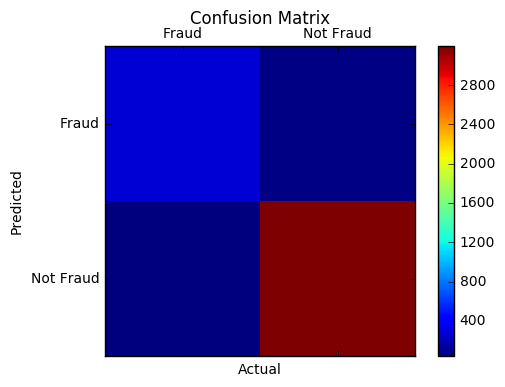

True Positive: 281 or 7.84 %
True Negative: 3198 or 89.21 %
False Positive: 64 or 1.79 %
False Negative: 42 or 1.17 %
Total 3585
Total Wrong: 106 or 2.96 %


Accuracy: 0.9704
Precision (Positive Predictive Value): 0.8145
Negative Predictive Value: 0.987
Recall (True Positive Rate): 0.87
Specificity (True Negative Rate): 0.9804


In [7]:
print "RF1"
print "RF1 Train score:", np.around(rf1.score(X_train, y_train, sample_weight_train),4)
print "RF1 Test score:", np.around(rf1.score(X_test, y_test, sample_weight_test),4)
print "\n"
print "Accuracy Score (>0.30):", np.around(accuracy_score(y_test,
                                                          rf1.predict_proba(X_test)[:,1] > 0.3, 
                                                          sample_weight=sample_weight_test),4)
print "Accuracy Score (>0.50):", np.around(accuracy_score(y_test,
                                                          rf1.predict_proba(X_test)[:,1] > 0.5, 
                                                          sample_weight=sample_weight_test),4)
print "Accuracy Score:", np.around(accuracy_score(y_test,
                                                  rf1.predict(X_test), 
                                                  sample_weight=sample_weight_test),4)
print "Precision Score:", np.around(precision_score(y_test,
                                                    rf1.predict_proba(X_test)[:,1] > 0.3, 
                                                    sample_weight=sample_weight_test),4)
print "Recall Score:", np.around(recall_score(y_test,
                                              rf1.predict_proba(X_test)[:,1] > 0.3, 
                                              sample_weight=sample_weight_test),4)
print "\n"
show_confusion_matrix(y_test, rf1.predict_proba(X_test)[:,1] > 0.3, truelabel='Fraud', falselabel='Not Fraud')

In [8]:
rf2 = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                             random_state=None, verbose=0, warm_start=False, class_weight={0:0.91, 1:0.09})

rf2.fit(X_train, y_train,sample_weight_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.91, 1: 0.09},
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

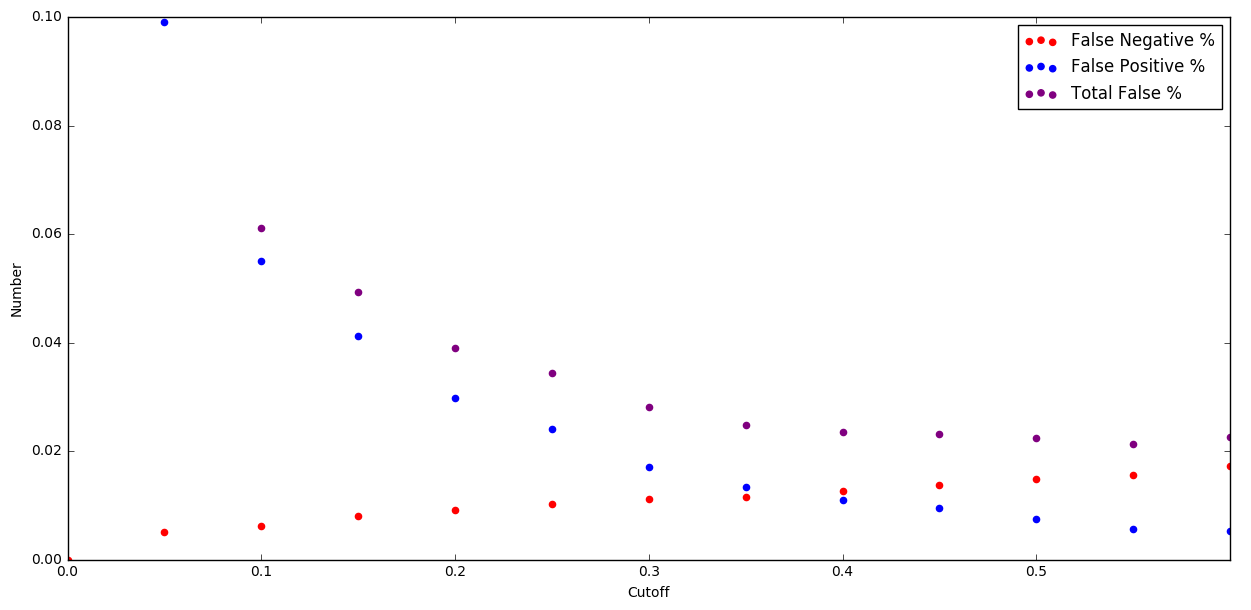

In [9]:
false_pos_pct = []
false_neg_pct = []
false_pct = []
cutoff = range(0,100,5)
cutoff_pct =[]

for i in cutoff:
    CM = confusion_matrix(y_test, rf2.predict_proba(X_test)[:,1] > i/float(100))
    tp = CM[1,1]
    fp = CM[0,1]
    fn = CM[1,0]
    tn = CM[0,0]
    total = float(tp+tn+fp+fn)    

    false_pos_pct.append(fp/total)
    false_neg_pct.append(fn/total)
    false_pct.append(fp/total+fn/total)

for i in cutoff:
    cutoff_pct.append(i/float(100))
    
plt.figure(figsize=(15,7))
plt.scatter(cutoff_pct, false_neg_pct, color='red', label='False Negative %')
plt.scatter(cutoff_pct, false_pos_pct, color='blue', label='False Positive %')
plt.scatter(cutoff_pct, false_pct, color='purple', label='Total False %')
plt.ylim(0.0,0.1)
plt.xlim(0, 0.6)
plt.xlabel('Cutoff')
plt.ylabel('Number')
plt.legend()
plt.show()

RF2
RF2 Train score: 1.0
RF2 Test score: 0.990211810548


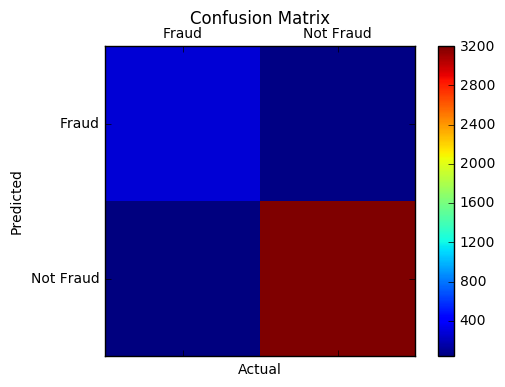

True Positive: 283 or 7.89 %
True Negative: 3201 or 89.29 %
False Positive: 61 or 1.7 %
False Negative: 40 or 1.12 %
Total 3585
Total Wrong: 101 or 2.82 %


Accuracy: 0.9718
Precision (Positive Predictive Value): 0.8227
Negative Predictive Value: 0.9877
Recall (True Positive Rate): 0.8762
Specificity (True Negative Rate): 0.9813


Accuracy Score: 0.979309355494
Precision Score: 0.302765473483
Recall Score: 0.869969040248


In [10]:
print "RF2"
print "RF2 Train score:", rf2.score(X_train, y_train, sample_weight_train)
print "RF2 Test score:", rf2.score(X_test, y_test, sample_weight_test)
show_confusion_matrix(y_test, rf2.predict_proba(X_test)[:,1] > 0.3, 'Fraud', 'Not Fraud')
print "\n"
print "Accuracy Score:", accuracy_score(y_test,rf1.predict_proba(X_test)[:,1] > 0.3, sample_weight=sample_weight_test)
print "Precision Score:", precision_score(y_test,rf1.predict_proba(X_test)[:,1] > 0.3, sample_weight=sample_weight_test)
print "Recall Score:", recall_score(y_test,rf1.predict_proba(X_test)[:,1] > 0.3, sample_weight=sample_weight_test)

In [11]:
log1 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                         class_weight={0:0.91, 1:0.09}, random_state=None, solver='sag', max_iter=2000, 
                         multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1)

log1.fit(X_train, y_train,sample_weight_train)

C:\Users\MKM\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight={0: 0.91, 1: 0.09}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5000,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

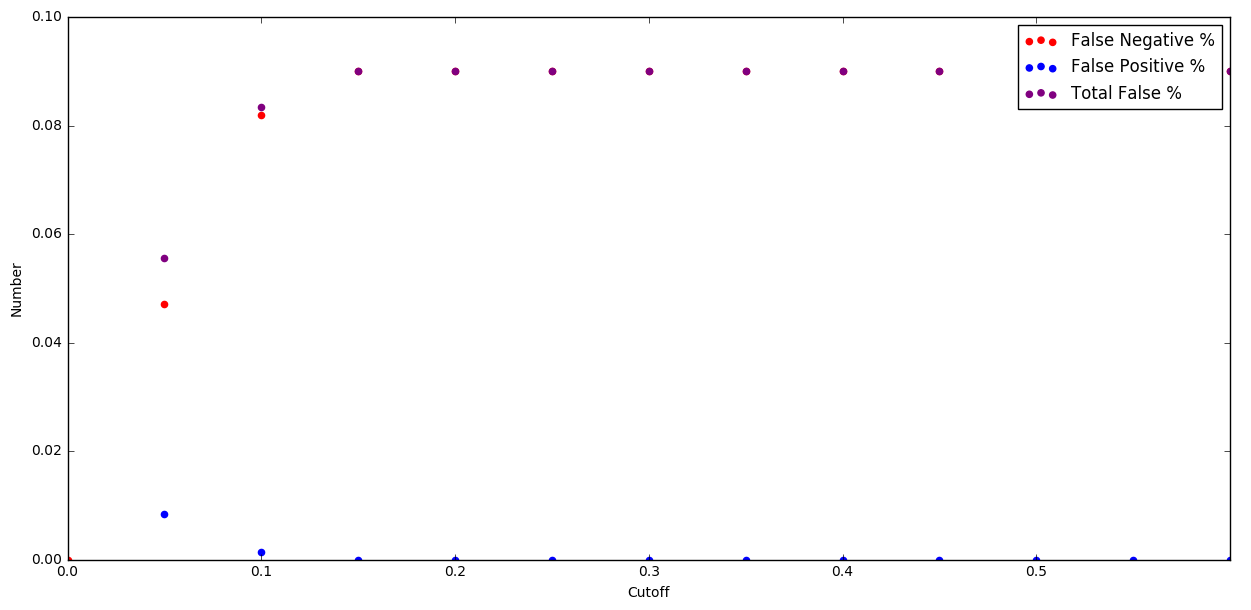

In [12]:
false_pos_pct = []
false_neg_pct = []
false_pct = []
cutoff = range(0,100,5)
cutoff_pct =[]

for i in cutoff:
    CM = confusion_matrix(y_test, log1.predict_proba(X_test)[:,1] > i/float(100))
    tp = CM[1,1]
    fp = CM[0,1]
    fn = CM[1,0]
    tn = CM[0,0]
    total = float(tp+tn+fp+fn)    

    false_pos_pct.append(fp/total)
    false_neg_pct.append(fn/total)
    false_pct.append(fp/total+fn/total)

for i in cutoff:
    cutoff_pct.append(i/float(100))
    
plt.figure(figsize=(15,7))
plt.scatter(cutoff_pct, false_neg_pct, color='red', label='False Negative %')
plt.scatter(cutoff_pct, false_pos_pct, color='blue', label='False Positive %')
plt.scatter(cutoff_pct, false_pct, color='purple', label='Total False %')
plt.ylim(0.0,0.1)
plt.xlim(0, 0.6)
plt.xlabel('Cutoff')
plt.ylabel('Number')
plt.legend()
plt.show()

Log1 Train score: 0.990288043502
Log1 Test score: 0.990301885911


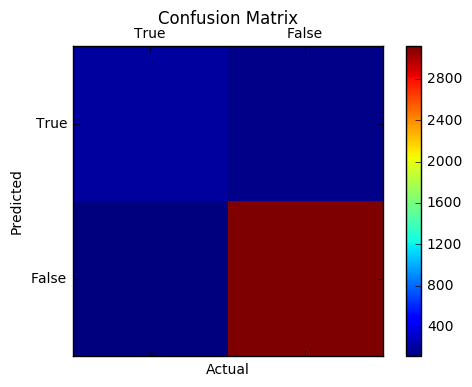

True Positive: 205 or 5.72 %
True Negative: 3118 or 86.97 %
False Positive: 144 or 4.02 %
False Negative: 118 or 3.29 %
Total 3585
Total Wrong: 262 or 7.31 %


Accuracy: 0.9269
Precision (Positive Predictive Value): 0.5874
Negative Predictive Value: 0.9635
Recall (True Positive Rate): 0.6347
Specificity (True Negative Rate): 0.9559


Accuracy Score: 0.952740459518
Precision Score: 0.123419626731
Recall Score: 0.634674922601


In [19]:
print "Log1 Train score:", log1.score(X_train, y_train, sample_weight_train)
print "Log1 Test score:", log1.score(X_test, y_test, sample_weight_test)
show_confusion_matrix(y_test, log1.predict_proba(X_test)[:,1] > 0.01)
print "\n"
print "Accuracy Score:", accuracy_score(y_test,log1.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)
print "Precision Score:", precision_score(y_test,log1.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)
print "Recall Score:", recall_score(y_test,log1.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)

In [14]:
log2 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                          class_weight={0:0.91, 1:0.09}, random_state=None, solver='lbfgs', max_iter=2000, 
                          multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1)

log2.fit(X_train, y_train,sample_weight_train)

LogisticRegression(C=1.0, class_weight={0: 0.91, 1: 0.09}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

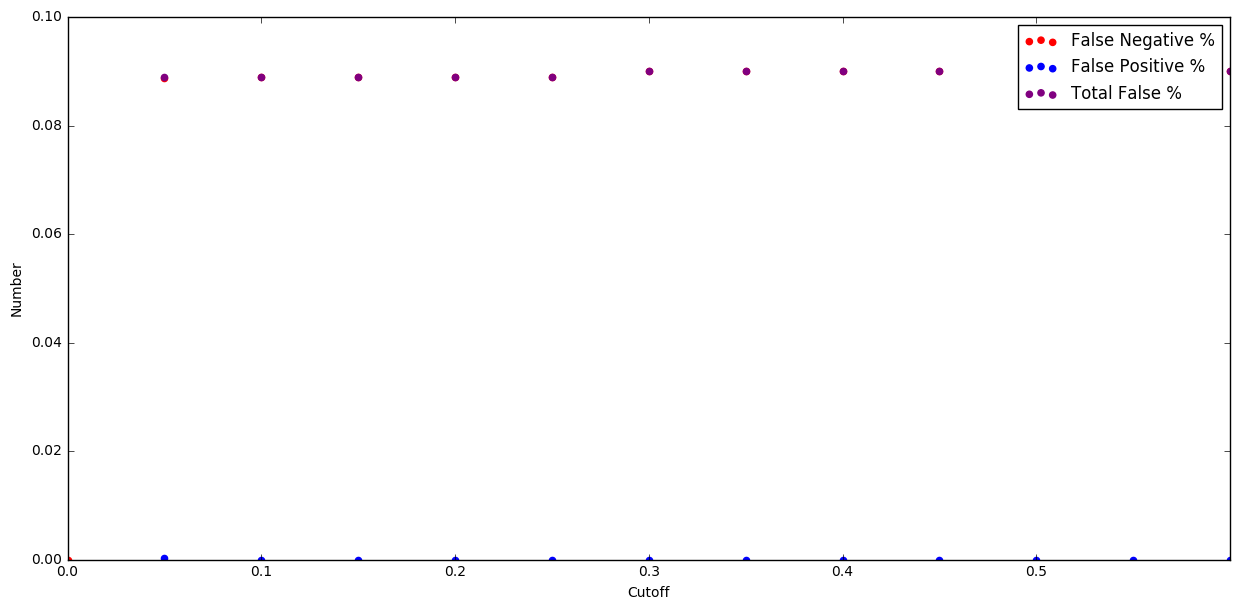

In [15]:
false_pos_pct = []
false_neg_pct = []
false_pct = []
cutoff = range(0,100,5)
cutoff_pct =[]

for i in cutoff:
    CM = confusion_matrix(y_test, log2.predict_proba(X_test)[:,1] > i/float(100))
    tp = CM[1,1]
    fp = CM[0,1]
    fn = CM[1,0]
    tn = CM[0,0]
    total = float(tp+tn+fp+fn)    

    false_pos_pct.append(fp/total)
    false_neg_pct.append(fn/total)
    false_pct.append(fp/total+fn/total)

for i in cutoff:
    cutoff_pct.append(i/float(100))
    
plt.figure(figsize=(15,7))
plt.scatter(cutoff_pct, false_neg_pct, color='red', label='False Negative %')
plt.scatter(cutoff_pct, false_pos_pct, color='blue', label='False Positive %')
plt.scatter(cutoff_pct, false_pct, color='purple', label='Total False %')
plt.ylim(0.0,0.1)
plt.xlim(0, 0.6)
plt.xlabel('Cutoff')
plt.ylabel('Number')
plt.legend()
plt.show()

Log2 Train score: 0.990298055829
Log2 Test score: 0.990301885911


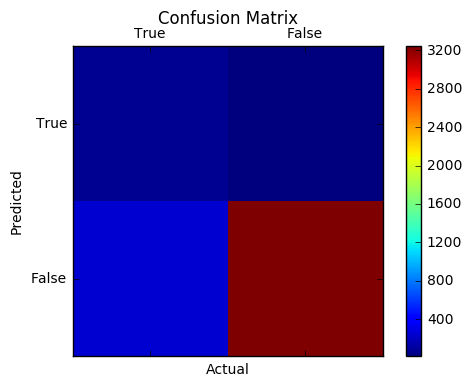

True Positive: 71 or 1.98 %
True Negative: 3245 or 90.52 %
False Positive: 17 or 0.47 %
False Negative: 252 or 7.03 %
Total 3585
Total Wrong: 269 or 7.5 %


Accuracy: 0.925
Precision (Positive Predictive Value): 0.8068
Negative Predictive Value: 0.9279
Recall (True Positive Rate): 0.2198
Specificity (True Negative Rate): 0.9948


Accuracy Score: 0.987272684813
Precision Score: 0.292314730101
Recall Score: 0.219814241486


In [16]:
print "Log2 Train score:", log2.score(X_train, y_train, sample_weight_train)
print "Log2 Test score:", log2.score(X_test, y_test, sample_weight_test)
show_confusion_matrix(y_test, log2.predict_proba(X_test)[:,1] > 0.01)
print "\n"
print "Accuracy Score:", accuracy_score(y_test,log2.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)
print "Precision Score:", precision_score(y_test,log2.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)
print "Recall Score:", recall_score(y_test,log2.predict_proba(X_test)[:,1] > 0.01, sample_weight=sample_weight_test)

In [20]:
# The Second Random Forest (rf2) looks like the winner.
with open('rf2.pkl', 'w') as f:
    pickle.dump(rf2, f)